In [5]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
import numpy as np

In [7]:
confirmed_df = pd.read_csv("time_series_covid19_confirmed_global.csv")
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,07-04-2020,07-05-2020,07-06-2020,07-07-2020,07-08-2020,07-09-2020,07-10-2020,07-11-2020,07-12-2020,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525


In [8]:
recoveries_df = pd.read_csv("time_series_covid19_recovered_global.csv")
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,07-04-2020,07-05-2020,07-06-2020,07-07-2020,07-08-2020,07-09-2020,07-10-2020,07-11-2020,07-12-2020,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,800,800,800,800,802,802,803,803,803,803
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,108,108,108,117,117,117,117,118,118,118


In [9]:
latest_data = pd.read_csv("csse_daily.csv")
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-13 04:43:04,34.223334,-82.461707,153,1,0,152.0,"Abbeville, South Carolina, US",623.802340,0.653595
1,22001.0,Acadia,Louisiana,US,2020-07-13 04:43:04,30.295065,-92.414197,1339,45,0,1294.0,"Acadia, Louisiana, US",2158.111048,3.360717
2,51001.0,Accomack,Virginia,US,2020-07-13 04:43:04,37.767072,-75.632346,1042,14,0,1028.0,"Accomack, Virginia, US",3224.408962,1.343570
3,16001.0,Ada,Idaho,US,2020-07-13 04:43:04,43.452658,-116.241552,4146,25,0,4121.0,"Ada, Idaho, US",860.903637,0.602991
4,19001.0,Adair,Iowa,US,2020-07-13 04:43:04,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000


In [11]:
cols = confirmed_df.keys()

In [15]:
deaths_df=pd.read_csv('time_series_covid19_deaths_global.csv')
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,07-04-2020,07-05-2020,07-06-2020,07-07-2020,07-08-2020,07-09-2020,07-10-2020,07-11-2020,07-12-2020,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,826,864,898,920,936,957,971,994,1010,1012
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,74,76,79,81,83,83,85,89,93,95
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,946,952,959,968,978,988,996,1004,1011,1018
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19,19,19,21,21,22,23,23,26,26


In [16]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [17]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 

china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 

china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_df[confirmed_df['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_df[confirmed_df['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_df[confirmed_df['Country/Region']=='United Kingdom'][i].sum())
    
    china_deaths.append(deaths_df[deaths_df['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_df[deaths_df['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_df[deaths_df['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_df[deaths_df['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_df[deaths_df['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_df[deaths_df['Country/Region']=='United Kingdom'][i].sum())
    
    china_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='United Kingdom'][i].sum())

In [18]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)

# deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)

# recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)

In [19]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [20]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [ ]:
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [23]:
#using linear regression
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [25]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.05, shuffle=False)

In [27]:
X_train_confirmed.shape,X_test_confirmed.shape

((165, 1), (9, 1))

In [28]:
y_train_confirmed.shape, y_test_confirmed.shape

((165, 1), (9, 1))

In [29]:
lm = LinearRegression()

In [32]:
lm=lm.fit(X_train_confirmed,y_train_confirmed)

In [33]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
pred=lm.predict(X_test_confirmed)

In [37]:
pred

array([[8523461.39379157],
       [8589004.24782411],
       [8654547.10185665],
       [8720089.95588919],
       [8785632.80992173],
       [8851175.66395427],
       [8916718.5179868 ],
       [8982261.37201934],
       [9047804.22605188]])

In [39]:
y_test_confirmed

array([[11452196],
       [11620096],
       [11829602],
       [12041480],
       [12268518],
       [12498467],
       [12717908],
       [12910357],
       [13104391]], dtype=int64)

In [ ]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Predictions')

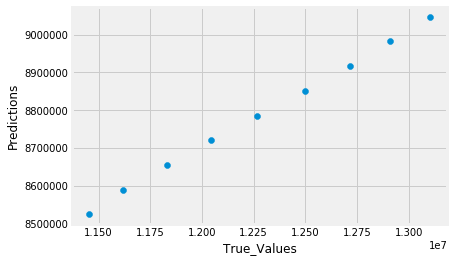

In [40]:
plt.scatter(y_test_confirmed, pred)
plt.xlabel("True_Values")
plt.ylabel("Predictions")

In [51]:
#using logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.05, shuffle=False)

In [55]:
X_train_confirmed.shape,X_test_confirmed.shape

((165, 1), (9, 1))

In [56]:
y_train_confirmed.shape, y_test_confirmed.shape

((165, 1), (9, 1))

In [57]:
lm = LogisticRegression()

In [59]:
lm=lm.fit(X_train_confirmed,y_train_confirmed)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [60]:
lm

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
pred=lm.predict(X_test_confirmed)

In [63]:
pred

array([11269114, 11269114, 11269114, 11269114, 11269114, 11269114,
       11269114, 11269114, 11269114], dtype=int64)

In [64]:
y_test_confirmed

array([[11452196],
       [11620096],
       [11829602],
       [12041480],
       [12268518],
       [12498467],
       [12717908],
       [12910357],
       [13104391]], dtype=int64)

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
cf=confusion_matrix(y_test_confirmed,pred)

In [67]:
cf

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [73]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'predicted values')

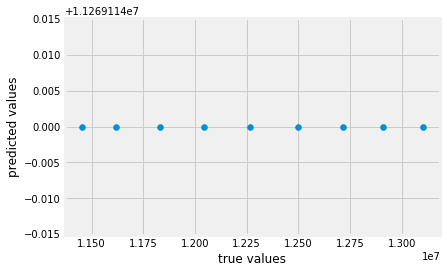

In [74]:
plt.scatter(y_test_confirmed,pred)
plt.xlabel("true values")
plt.ylabel("predicted values")